In [1]:
import uuid
import glob
import pandas as pd
from autogluon.multimodal import MultiModalPredictor
from autogluon.multimodal.utils import SemanticSegmentationVisualizer

In [2]:
x_train_dir = "../datasets/dataset_segmentacao/train/images/"
y_train_dir = "../datasets/dataset_segmentacao/train/masks/"

x_valid_dir = "../datasets/dataset_segmentacao/valid/images/"
y_valid_dir = "../datasets/dataset_segmentacao/valid/masks/"

x_test_dir = "../datasets/dataset_segmentacao/test/images/"
y_test_dir = "../datasets/dataset_segmentacao/test/masks/"    

In [3]:
train_images = glob.glob(f"{x_train_dir}*.png")
train_labels = glob.glob(f"{y_train_dir}*.png")
val_images = glob.glob(f"{x_valid_dir}*.png")
val_labels = glob.glob(f"{y_valid_dir}*.png")
test_images = glob.glob(f"{x_test_dir}*.png")
test_labels = glob.glob(f"{y_test_dir}*.png")

In [4]:
df_seg_train = pd.DataFrame(train_images,columns=['image'])
df_seg_train['semantic_masks'] = train_labels
df_seg_val = pd.DataFrame(val_images,columns=['image'])
df_seg_val['semantic_masks'] = val_labels
df_seg_test = pd.DataFrame(test_images,columns=['image'])
df_seg_test['semantic_masks'] = test_labels

In [15]:
pd.set_option('display.max_colwidth',300)
df_seg_val.head()

,image,semantic_masks
0,../datasets/dataset_segmentacao/valid/images\1965-Shelby-Cobra-Roadster-Side-Profile.png,../datasets/dataset_segmentacao/valid/masks\1965-Shelby-Cobra-Roadster-Side-Profile.png
1,../datasets/dataset_segmentacao/valid/images\2008-Morgan-Life-Car-Side-Speed-1024x768.png,../datasets/dataset_segmentacao/valid/masks\2008-Morgan-Life-Car-Side-Speed-1024x768.png
2,../datasets/dataset_segmentacao/valid/images\2011-278656-pagani-huayra-side-view1.png,../datasets/dataset_segmentacao/valid/masks\2011-278656-pagani-huayra-side-view1.png
3,../datasets/dataset_segmentacao/valid/images\2019-ferrari-488-spider-side-view-carbuzz-669506.png,../datasets/dataset_segmentacao/valid/masks\2019-ferrari-488-spider-side-view-carbuzz-669506.png
4,../datasets/dataset_segmentacao/valid/images\bb29a1ee64eaa0186407c5d2ead9c959.png,../datasets/dataset_segmentacao/valid/masks\bb29a1ee64eaa0186407c5d2ead9c959.png


In [5]:
visualizer = SemanticSegmentationVisualizer()

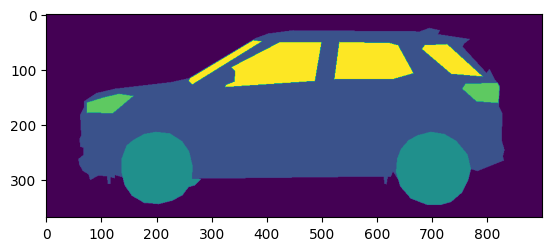

In [6]:
visualizer.plot_image(df_seg_test.iloc[0]['semantic_masks'])

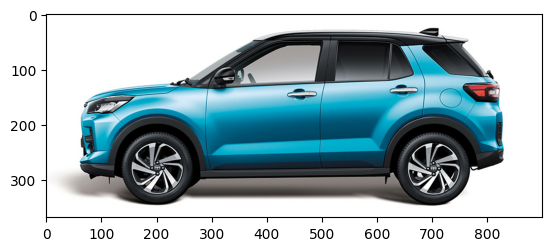

In [7]:
visualizer.plot_image(df_seg_test.iloc[0]['image'])

In [16]:
predictor = MultiModalPredictor(label='semantic_masks', 
path=f't{uuid.uuid4()}',
problem_type='semantic_segmentation',
presets="medium_quality")

In [17]:
predictor.fit(
    train_data=df_seg_train,
    tuning_data=df_seg_val,
    time_limit=180
)

=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.20
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
Pytorch Version:    2.5.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       4.11 GB / 15.87 GB (25.9%)
Disk Space Avail:   17.27 GB / 222.95 GB (7.7%)

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir c:\Users\dpatricio\Documents\Curso_Redes_Neurais\git\Redes_Neurais_Intermediario-Avancado\Notebooks\te2fdeeef-bb8b-4837-b5fb-2f6d18c7bcec
    ```

Seed set to 0
GPU Count: 0
GPU Count to be Used: 0

c:\Users\dpatricio\Anaconda3\envs\auto_ml\lib\site-packages\autogluon\multimodal\utils\environment.py:131: UserWarning: Only CPU is detected in the instance. This may result in slow speed for MultiModalPredictor. Conside

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1073741824 bytes.

In [ ]:
scores = predictor.evaluate(df_seg_test, metrics=["iou"])
print(scores)

In [ ]:
pred = predictor.predict({'image': [df_seg_test.iloc[0]['image']]})

In [ ]:
visualizer.plot_mask(pred)